# explicit 데이터만 surprise로 돌리는 파일

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from surprise import Dataset 
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score,classification_report

In [2]:
import pandas as pd
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

ratings = pd.read_csv('notcrawling_comment_review.csv')
ratings = ratings[['user_id','product_id','rating']]
# ratings = ratings.astype('int')
# ratings['rating'] *= 1/5


rating_0=ratings[ratings['rating']==0].index
ratings=ratings.drop(rating_0)

ratings['rating'].value_counts()

5.000000    274
3.000000    219
4.500000    115
4.000000    114
4.200000    113
4.600000    101
3.800000    101
4.400000     99
4.800000     94
3.600000     86
3.400000     73
4.100000     63
4.300000     63
4.700000     61
3.700000     49
3.900000     48
4.900000     48
3.500000     47
3.200000     38
3.100000     32
3.300000     31
2.900000     16
2.800000     10
2.700000      8
2.500000      7
4.666667      5
2.200000      5
2.600000      5
2.000000      4
1.000000      4
2.300000      4
1.500000      4
2.400000      3
4.333333      2
3.666667      2
2.100000      2
0.200000      1
0.400000      1
0.900000      1
4.833333      1
0.800000      1
1.800000      1
1.100000      1
1.700000      1
1.900000      1
0.500000      1
Name: rating, dtype: int64

In [495]:
ratings

,user_id,product_id,rating
0,35941,45,4.8
1,35941,77,4.9
2,35941,117,4.1
3,36449,75,4.6
4,36449,117,5.0
...,...,...,...
1955,87065,1585,3.0
1956,123367,1637,4.8
1957,91839,1635,3.2
1958,123494,1637,4.8


In [3]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(ratings['rating'].values.reshape(-1,1))
ratings.insert(0, 'scaled', scaled)
ratings.drop(['rating'], axis=1, inplace=True)
ratings=ratings[["user_id",'product_id','scaled']]
ratings.rename(columns={'scaled':'rating'}, inplace=True)
ratings

,user_id,product_id,rating
0,35941,45,0.958333
1,35941,77,0.979167
2,35941,117,0.812500
3,36449,75,0.916667
4,36449,117,1.000000
...,...,...,...
1955,87065,1585,0.583333
1956,123367,1637,0.958333
1957,91839,1635,0.625000
1958,123494,1637,0.958333


In [5]:
ratings.to_csv("scaled_not.csv")

In [497]:
reader = Reader(rating_scale=(0.0, 1.0))

# load_from_df사용해서 데이터프레임을 데이터셋으로 로드
# 인자에 userid-itemid-ratings 변수들이 포함된 데이터프레임형태로 넣어주면 됨!
data = Dataset.load_from_df(ratings[['user_id','product_id','rating']],
                           reader=reader)
train, test = train_test_split(data, test_size=0.25, random_state=42)

In [498]:
ratings['rating'].value_counts()

1.000000    274
0.583333    219
0.895833    115
0.791667    114
0.833333    113
0.750000    101
0.916667    101
0.875000     99
0.958333     94
0.708333     86
0.666667     73
0.812500     63
0.854167     63
0.937500     61
0.729167     49
0.979167     48
0.770833     48
0.687500     47
0.625000     38
0.604167     32
0.645833     31
0.562500     16
0.541667     10
0.520833      8
0.479167      7
0.930556      5
0.416667      5
0.500000      5
0.166667      4
0.437500      4
0.270833      4
0.375000      4
0.458333      3
0.722222      2
0.861111      2
0.395833      2
0.312500      1
0.062500      1
0.965278      1
0.354167      1
0.333333      1
0.125000      1
0.145833      1
0.041667      1
0.187500      1
0.000000      1
Name: rating, dtype: int64

In [499]:
from surprise import SVD
algo = SVD()
algo.fit(train)

In [500]:
prediction = algo.test(test)
print('prediction type: ', type(prediction),
     'size: ', len(prediction))
print()
print('prediction 결과값 5개 미리보기')
print(prediction[:5])

prediction type:  <class 'list'> size:  490

prediction 결과값 5개 미리보기
[Prediction(uid=85968, iid=494, r_ui=0.9166666666666666, est=0.7523259234274223, details={'was_impossible': False}), Prediction(uid=104175, iid=474, r_ui=0.5833333333333334, est=0.6588658332050255, details={'was_impossible': False}), Prediction(uid=20303, iid=80, r_ui=0.5833333333333334, est=0.8087320756757579, details={'was_impossible': False}), Prediction(uid=110521, iid=1322, r_ui=0.9166666666666666, est=0.7622089251341331, details={'was_impossible': False}), Prediction(uid=123199, iid=1423, r_ui=1.0, est=0.8193822610570871, details={'was_impossible': False})]


In [501]:
# user id, item id, 예측평점값들만 추출해서 하나의 튜플로 담겨있도록 하기
result = [(pred.uid, pred.iid, pred.est) for pred in prediction[:5]]
print(result)

[(85968, 494, 0.7523259234274223), (104175, 474, 0.6588658332050255), (20303, 80, 0.8087320756757579), (110521, 1322, 0.7622089251341331), (123199, 1423, 0.8193822610570871)]


In [502]:
# 개별 데이터에 대한 예측값 반환을 위해서 predict() 사용
# user id, item id는 문자열로 되어있기 때문에 문자열로 넣어주어야 함!
uid = str(79)
iid = str(3)
# 변수 순서 지켜주어서 넣어주어야 함!
pred = algo.predict(uid, iid)
print(pred)

user: 79         item: 3          r_ui = None   est = 0.79   {'was_impossible': False}


In [503]:
predictions = algo.test(test)
accuracy.rmse(predictions)

RMSE: 0.1583


0.15825846635055263

In [504]:
from surprise.model_selection import cross_validate

algo = SVD(n_factors=50, random_state=42)
# cross_validate에는 파라미터를 입력시켜 놓은 모델을 인자로 넣어주자!
cross_validate(algo, data, measures=['RMSE','MAE'], cv=5,
              verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.1502  0.1612  0.1450  0.1439  0.1620  0.1525  0.0078  
MAE (testset)     0.1185  0.1261  0.1190  0.1155  0.1277  0.1214  0.0047  
Fit time          0.03    0.03    0.03    0.03    0.03    0.03    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([0.1501719 , 0.16124977, 0.14500206, 0.14392658, 0.16198093]),
 'test_mae': array([0.11852219, 0.12607551, 0.11899122, 0.11550673, 0.12772364]),
 'fit_time': (0.028866052627563477,
  0.02847599983215332,
  0.028785228729248047,
  0.029397010803222656,
  0.029764175415039062),
 'test_time': (0.0016450881958007812,
  0.0009610652923583984,
  0.0010020732879638672,
  0.001447916030883789,
  0.0009989738464355469)}

/Users/duduuman/miniforge3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total number of ratings')

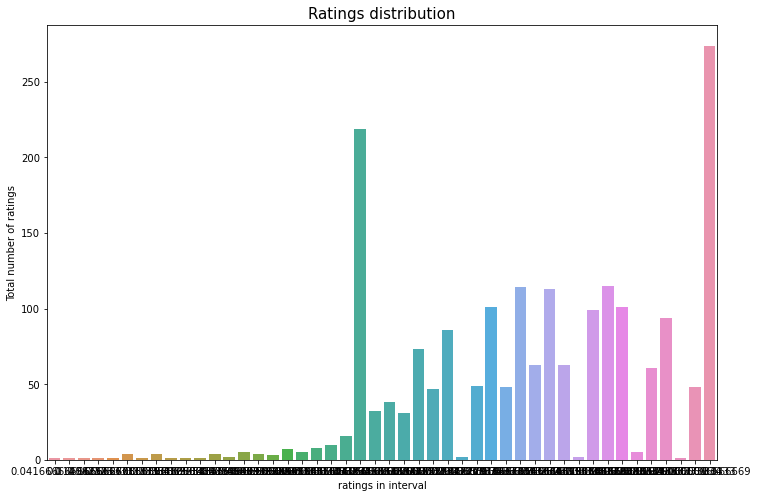

In [505]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Ratings distribution', fontsize=15)
sns.countplot(ratings['rating'])
ax.set_xlabel("ratings in interval")
ax.set_ylabel("Total number of ratings")

In [506]:
print("Size of trainset: ", train.n_ratings)
print("Size of testset: ", len(test))

Size of trainset:  1470
Size of testset:  490


In [507]:
# from surprise import BaselineOnly

In [508]:
# baseline_model = BaselineOnly(verbose = False)
# baseline_model.fit(train)

In [509]:
# train_predictions = baseline_model.test(train.build_testset())
# test_predictions = baseline_model.test(test)
# print("RMSE on training data : ", accuracy.rmse(train_predictions,verbose = False))
# print("RMSE on test data: ", accuracy.rmse(test_predictions,verbose = False))

# KNNWithMeans

In [510]:
from surprise import KNNWithMeans
knn_model = KNNWithMeans(random_state = 42,verbose = False)
knn_model.fit(train)

In [511]:
train_predictions = knn_model.test(train.build_testset())
test_predictions = knn_model.test(test)
print("RMSE on training data : ", accuracy.rmse(train_predictions, verbose = False))
print("RMSE on test data: ", accuracy.rmse(test_predictions, verbose = False))

RMSE on training data :  0.06839297126437402
RMSE on test data:  0.14515503418782347


In [512]:
param_grid = {'k': list(range(10,45,5)),
             'min_k' : list(range(5,11))}
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], return_train_measures = True, cv = 5)
gs.fit(data)
gs.best_params['rmse']

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

{'k': 15, 'min_k': 5}

In [513]:
tuned_knn_model = KNNWithMeans(k = 40, min_k= 8,random_state = 42, user_based = True, verbose = False)
tuned_knn_model.fit(train)
train_predictions = tuned_knn_model.test(train.build_testset())
test_predictions = tuned_knn_model.test(test)
print("RMSE on training data : ", accuracy.rmse(train_predictions, verbose = False))
print("RMSE on test data: ", accuracy.rmse(test_predictions, verbose = False))

print("MAE on training data : ", accuracy.mae(train_predictions, verbose = False))
print("MAE on test data: ", accuracy.mae(test_predictions, verbose = False))

RMSE on training data :  0.07868478078578814
RMSE on test data:  0.1445835626434653
MAE on training data :  0.049244487608713194
MAE on test data:  0.11132607851785425


In [514]:
knn_model_item_based = KNNWithMeans(k = 40, min_k= 8, user_based = False, random_state = 42)
knn_model_item_based.fit(train)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [515]:
train_predictions = knn_model_item_based.test(train.build_testset())
test_predictions = knn_model_item_based.test(test)
print("RMSE on training data : ", accuracy.rmse(train_predictions, verbose = False))
print("RMSE on test data: ", accuracy.rmse(test_predictions, verbose = False))

print("MAE on training data : ", accuracy.mae(train_predictions, verbose = False))
print("MAE on test data: ", accuracy.mae(test_predictions, verbose = False))

RMSE on training data :  0.07868478078578814
RMSE on test data:  0.1445835626434653
MAE on training data :  0.049244487608713194
MAE on test data:  0.11132607851785425


# KNNWithZScore

In [516]:
from surprise import KNNWithZScore
knn_model = KNNWithZScore(random_state = 42,verbose = False)
knn_model.fit(train)

In [517]:
train_predictions = knn_model.test(train.build_testset())
test_predictions = knn_model.test(test)
print("RMSE on training data : ", accuracy.rmse(train_predictions, verbose = False))
print("RMSE on test data: ", accuracy.rmse(test_predictions, verbose = False))

RMSE on training data :  0.0694852695860404
RMSE on test data:  0.14902696078344477


In [518]:
param_grid = {'k': list(range(10,45,5)),
             'min_k' : list(range(5,11))}
gs = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], return_train_measures = True, cv = 5)
gs.fit(data)
gs.best_params['rmse']

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

{'k': 10, 'min_k': 6}

In [519]:
tuned_knn_model = KNNWithZScore(k = 40, min_k= 7, random_state = 42, verbose = False)
tuned_knn_model.fit(train)
train_predictions = tuned_knn_model.test(train.build_testset())
test_predictions = tuned_knn_model.test(test)
print("RMSE on training data : ", accuracy.rmse(train_predictions, verbose = False))
print("RMSE on test data: ", accuracy.rmse(test_predictions, verbose = False))

print("MAE on training data : ", accuracy.mae(train_predictions, verbose = False))
print("MAE on test data: ", accuracy.mae(test_predictions, verbose = False))

RMSE on training data :  0.07894325213796557
RMSE on test data:  0.1454109307623831
MAE on training data :  0.05166897206864389
MAE on test data:  0.1122206820603592


In [520]:
knn_model_item_based = KNNWithZScore(k = 10, min_k= 5, user_based = False, random_state = 42)
knn_model_item_based.fit(train)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [521]:
train_predictions = knn_model_item_based.test(train.build_testset())
test_predictions = knn_model_item_based.test(test)
print("RMSE on training data : ", accuracy.rmse(train_predictions, verbose = False))
print("RMSE on test data: ", accuracy.rmse(test_predictions, verbose = False))

print("MAE on training data : ", accuracy.mae(train_predictions, verbose = False))
print("MAE on test data: ", accuracy.mae(test_predictions, verbose = False))

RMSE on training data :  0.07354200148490012
RMSE on test data:  0.1448900539015387
MAE on training data :  0.048441534397693095
MAE on test data:  0.11228075332657542


# SVD

In [522]:
svd_model = SVD(random_state = 42)
svd_model.fit(train)

In [523]:
train_predictions = svd_model.test(train.build_testset())
test_predictions = svd_model.test(test)
print("RMSE on training data : ", accuracy.rmse(train_predictions, verbose = False))
print("RMSE on test data: ", accuracy.rmse(test_predictions, verbose = False))

RMSE on training data :  0.12503057789330999
RMSE on test data:  0.15743844402089652


In [524]:
param_distributions  = {'n_factors': list(range(50,160,10)),'reg_all': np.arange(0.01,0.2,0.02),'n_epochs' : list(range(1,51))}
rs = RandomizedSearchCV(SVD, param_distributions, measures=['rmse'], return_train_measures = True, cv = 5, n_iter = 20)
rs.fit(data)
rs.best_params['rmse']

{'n_factors': 60, 'reg_all': 0.049999999999999996, 'n_epochs': 44}

In [525]:
tuned_svd_model = SVD(n_factors=80, reg_all =0.109, n_epochs = 40, random_state = 42,verbose = False)
tuned_svd_model.fit(train)
train_predictions = tuned_svd_model.test(train.build_testset())
test_predictions = tuned_svd_model.test(test)
print("RMSE on training data : ", accuracy.rmse(train_predictions, verbose = False))
print("RMSE on test data: ", accuracy.rmse(test_predictions, verbose = False))

print("MAE on training data : ", accuracy.mae(train_predictions, verbose = False))
print("MAE on test data: ", accuracy.mae(test_predictions, verbose = False))

RMSE on training data :  0.10005296213359215
RMSE on test data:  0.14436013887908994
MAE on training data :  0.07901865806508535
MAE on test data:  0.11691466499531811


# SVDpp

In [526]:
from surprise import SVDpp

In [527]:
svd_model = SVDpp(random_state = 42)
svd_model.fit(train)

In [528]:
train_predictions = svd_model.test(train.build_testset())
test_predictions = svd_model.test(test)
print("RMSE on training data : ", accuracy.rmse(train_predictions, verbose = False))
print("RMSE on test data: ", accuracy.rmse(test_predictions, verbose = False))

RMSE on training data :  0.11910031945299303
RMSE on test data:  0.14581089619268153


In [529]:
param_distributions  = {'n_factors': list(range(50,160,10)),'reg_all': np.arange(0.01,0.2,0.02),'n_epochs' : list(range(1,51))}
rs = RandomizedSearchCV(SVDpp, param_distributions, measures=['rmse'], return_train_measures = True, cv = 5, n_iter = 20)
rs.fit(data)
rs.best_params['rmse']

{'n_factors': 100, 'reg_all': 0.18999999999999997, 'n_epochs': 44}

In [530]:
tuned_svd_model = SVDpp(n_factors=50, reg_all =0.15, n_epochs = 43, random_state = 42,verbose = False)
tuned_svd_model.fit(train)
train_predictions = tuned_svd_model.test(train.build_testset())
test_predictions = tuned_svd_model.test(test)
print("RMSE on training data : ", accuracy.rmse(train_predictions, verbose = False))
print("RMSE on test data: ", accuracy.rmse(test_predictions, verbose = False))

print("MAE on training data : ", accuracy.mae(train_predictions, verbose = False))
print("MAE on test data: ", accuracy.mae(test_predictions, verbose = False))

RMSE on training data :  0.09085274106334702
RMSE on test data:  0.14177702692045047
MAE on training data :  0.07165548685319896
MAE on test data:  0.11481252857634608


# NMF

In [531]:
from surprise import NMF

In [532]:
nmf_model = NMF(random_state = 42)
nmf_model.fit(train)

In [533]:
train_predictions = nmf_model.test(train.build_testset())
test_predictions = nmf_model.test(test)
print("RMSE on training data : ", accuracy.rmse(train_predictions, verbose = False))
print("RMSE on test data: ", accuracy.rmse(test_predictions, verbose = False))

RMSE on training data :  0.07612801237778918
RMSE on test data:  0.169488264277367


In [534]:
train_predictions[:5]

[Prediction(uid=13681, iid=554, r_ui=0.8750000000000001, est=0.7899087902412941, details={'was_impossible': False}),
 Prediction(uid=13681, iid=1550, r_ui=0.9375000000000001, est=0.8712706417921001, details={'was_impossible': False}),
 Prediction(uid=13681, iid=677, r_ui=0.8958333333333334, est=0.8323143524952024, details={'was_impossible': False}),
 Prediction(uid=13681, iid=82, r_ui=0.8958333333333334, est=0.7786789917392865, details={'was_impossible': False}),
 Prediction(uid=13681, iid=83, r_ui=0.8750000000000001, est=0.776585855521228, details={'was_impossible': False})]

In [535]:
param_distributions  = {'n_factors': list(range(10,20,2)),'reg_pu': np.arange(0.01,0.2,0.01),'reg_qi': np.arange(0.01,0.2,0.01), 'n_epochs' : list(range(1,51))}
rs = RandomizedSearchCV(NMF, param_distributions, measures=['rmse'], return_train_measures = True, cv = 5, n_iter = 20)
rs.fit(data)
rs.best_params['rmse']

{'n_factors': 14, 'reg_pu': 0.05, 'reg_qi': 0.04, 'n_epochs': 24}

In [536]:
#tuned_nmf_model = NMF(n_factors=18, reg_pu = 0.06, reg_qi = 0.16, n_epochs = 38, random_state = 42)
tuned_nmf_model = NMF(n_factors=14, reg_pu=0.14, reg_qi= 0.02, n_epochs=8, random_state = 42)
tuned_nmf_model.fit(train)
train_predictions = tuned_nmf_model.test(train.build_testset())
test_predictions = tuned_nmf_model.test(test)
print("RMSE on training data : ", accuracy.rmse(train_predictions, verbose = False))
print("RMSE on test data: ", accuracy.rmse(test_predictions, verbose = False))

print("MAE on training data : ", accuracy.mae(train_predictions, verbose = False))
print("MAE on test data: ", accuracy.mae(test_predictions, verbose = False))

RMSE on training data :  0.1506027750673662
RMSE on test data:  0.16239178359340567
MAE on training data :  0.12702630868001846
MAE on test data:  0.1277786929877165


# ----------------------------------------------------------------

# precision recall metric

In [537]:
userIds = []
productIds = []
ratings = []
for (uid, iid, rating) in train.all_ratings():
    userIds.append(train.to_raw_uid(uid))
    productIds.append(train.to_raw_iid(iid))
    ratings.append(rating)
dict = {'userId': userIds, 'productIds': productIds, 'rating': ratings}
training_df = pd.DataFrame(dict)

In [538]:
user_averages = training_df.groupby("userId")["rating"].mean()
user_averages

userId
4         0.732639
43        0.888889
48        0.758333
931       0.583333
2839      0.895833
            ...   
123506    0.847222
123511    0.781250
123857    1.000000
123919    0.916667
124246    0.625000
Name: rating, Length: 822, dtype: float64

In [539]:
train_actual_labels = []
train_predicted_labels = []
for uid, iid, r_ui, est, _ in train_predictions:
    if((r_ui - user_averages[uid])>0):
        train_actual_labels.append("Yes")
    else:
        train_actual_labels.append("No")
    if((est - user_averages[uid])>0):
        train_predicted_labels.append("Yes")
    else:
        train_predicted_labels.append("No")

In [540]:
print("Training data distribution of liked movies derived from actual ratings")
print(pd.Series(train_actual_labels).value_counts())
print("\nTraining data distribution of liked movies derived from predicted ratings")
print(pd.Series(train_predicted_labels).value_counts())

Training data distribution of liked movies derived from actual ratings
No     1025
Yes     445
dtype: int64

Training data distribution of liked movies derived from predicted ratings
Yes    1329
No      141
dtype: int64


In [541]:
user_averages = training_df.groupby("userId")["rating"].mean()
user_averages

userId
4         0.732639
43        0.888889
48        0.758333
931       0.583333
2839      0.895833
            ...   
123506    0.847222
123511    0.781250
123857    1.000000
123919    0.916667
124246    0.625000
Name: rating, Length: 822, dtype: float64

In [542]:
# test

In [543]:
test_actual_labels = []
test_predicted_labels = []

for uid, iid, r_ui, est, _ in test_predictions:
    if uid in user_averages: 
        if((r_ui - user_averages[uid])>0):
            test_actual_labels.append("Yes")
        else:
            test_actual_labels.append("No")
        if((est - user_averages[uid])>0):
            test_predicted_labels.append("Yes")
        else:
            test_predicted_labels.append("No") 

In [544]:
print("Test data distribution of liked movies derived from actual ratings")
print(pd.Series(test_actual_labels).value_counts())
print("\nTest data distribution of liked movies derived from predicted ratings")
print(pd.Series(test_predicted_labels).value_counts())

Test data distribution of liked movies derived from actual ratings
Yes    151
No     147
dtype: int64

Test data distribution of liked movies derived from predicted ratings
Yes    226
No      72
dtype: int64


In [545]:
print("Confusion matrix on test data")
confusion_matrix(test_actual_labels,test_predicted_labels)

Confusion matrix on test data


array([[ 49,  98],
       [ 23, 128]])

In [546]:
print("Training data precision : ", precision_score(train_actual_labels,train_predicted_labels,pos_label="Yes"))
print("Test data precision : ", precision_score(test_actual_labels,test_predicted_labels,pos_label="Yes"))

Training data precision :  0.33483822422874343
Test data precision :  0.5663716814159292


In [547]:
print("Training data recall : ", recall_score(train_actual_labels,train_predicted_labels,pos_label="Yes"))
print("Test data recall : ", recall_score(test_actual_labels,test_predicted_labels,pos_label="Yes"))

Training data recall :  1.0
Test data recall :  0.847682119205298


In [548]:
print("="*20, "Classification Report", "="*20)
print(classification_report(test_actual_labels,test_predicted_labels))

==================== Classification Report ====================
              precision    recall  f1-score   support

          No       0.68      0.33      0.45       147
         Yes       0.57      0.85      0.68       151

    accuracy                           0.59       298
   macro avg       0.62      0.59      0.56       298
weighted avg       0.62      0.59      0.56       298

